<a href="https://colab.research.google.com/github/rnmarin/portfolio/blob/main/AnaliseDadosAirbnbParispt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


###<center>**Renan Marin: Accountant, but not a common accountant**<center>

<br>

#Analise de Dados do Airbnb:

O **Airbnb** é uma das maiores de empresas hoteleiras do mundo e o mais interessante não possuí nenhum hotel.

Conectando pessoas que viajam com anfitriões que desejam alugar seus imóveis de maneira ágil, fácil e segura. Ao fim de 2018 a empresa já havia ajudado mais de **300 milhões de hóspedes** que estavam a procura de uma boa experiência.

Uma de suas virtudes é disponibilizar seus dados das principais cidades cidades do mundo através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), dando possibilidade para que possamos inferir sobre os dados e poder usar de técnicas de *Data Science*.

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

A cidedade escolhida para esse estudo exploratório foi:

<br>

<center>PARIS<center>
<center><img alt="Analisando Airbnb" width="10%" src="https://upload.wikimedia.org/wikipedia/en/thumb/c/c3/Flag_of_France.svg/375px-Flag_of_France.svg.png"></center>

**Neste *notebook* ralizarei a analise dos dados da ciadade de Paris e verificar quais *insights* podem ser retirados dos dados brutos fornecidos pela Airbnb.**

<br>

Paris também conhecida por *La ville lumière*, para quem já a conhece não é necessário muitas explicações sobre sua beleza e romantismo. Uma cidade rica de detalhes e com um ar histórico facinante. Sexta capital mais visitada do mundo, segundo levantamento da *Euromonitor International* em 2019.

<br>

O apelido de cidade das luzes denota de eventos históricos importantes. Em 1665 nasce em Paris o primeiro sistema público de iluminação e também em 1881 ocorre a primeira exposição internacional de eletrecidade. Além disso, a cidade foi um importante reduto de pensadores, filósosfos e artistas do movimento iluminista.
  
<br>

<center><img alt="Analisando Airbnb" width="90%" src="https://cdn.radiofrance.fr/s3/cruiser-production/2019/03/f8d6163e-803f-4a76-b018-f56ea732ecac/1136_gettyimages-956138032.webp"></center>

Le Pont Alexandre III éclairé © Getty / Ian.CuiY



#Fonte dos Dados

Os dados foram retirados no portal  [Inside Airbnb](http://insideairbnb.com/get-the-data.html), onde foi extraido o seguinte arquivo em relação à cidade de Paris:
* listing.csv


In [ ]:
#Importando Libs:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#Importando o dataframe:

df = pd.read_csv("/content/drive/MyDrive/Sigmoidal/listings.csv")

#Descrição dos Dados

Para se ter um melhor entendimento dos dados abaixo está uma relação de suas decrições.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

In [ ]:
#Visualizando as 5 entradas do df:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86993,2.36251,Entire home/apt,125,3,1,2019-01-02,0.04,1,364
1,3109,zen and calm,3631,Anne,NaN,Observatoire,48.83349,2.31852,Entire home/apt,60,2,9,2019-10-24,0.19,1,2
2,4890,Quiet Historic & Cute +Free Cruise,6792,Ryan Of Cobblestone,NaN,Temple,48.86409,2.35651,Entire home/apt,69,5,23,2020-09-07,0.21,14,67
3,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85207,2.35871,Entire home/apt,62,1,231,2020-11-05,1.65,1,90
4,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85758,2.35275,Entire home/apt,53,15,269,2020-08-15,2.28,3,348


## **1) Analisando atributos (variáveis), quantidade de dados e os tipos de dados que o conjuto o dataframe possui**

Para uma melhor comprensão dos dados analisamos por variável e a disposição de cada informação.

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 65917
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## **2) Analise de dados em relação à quantidade de valores ausentes**



In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.237996
last_review                       0.237996
name                              0.000971
host_name                         0.000425
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

* É possível observar que somente as variáveis `neighbourhood_group`, `reviews_per_month`, `last_review`, `host_name` e `name` possuem valores ausentes;

* `neighbourhood_group`apresenta 100% de valores ausentes;

* `reviews_per_month` e `last_review` possuem  aproximadamente 23,80% de seus valores ausentes;

* As variáveis `host_name` e `name` possuem ausencias de valores menores, correspondentes em 9,71% e 4,25%.

**Será analisado adiante a interferência dessas ausências para o modelo, bem como a necessidade de tratamento nessas informações.**

## **3) Analisando a distribuição das variáveis**

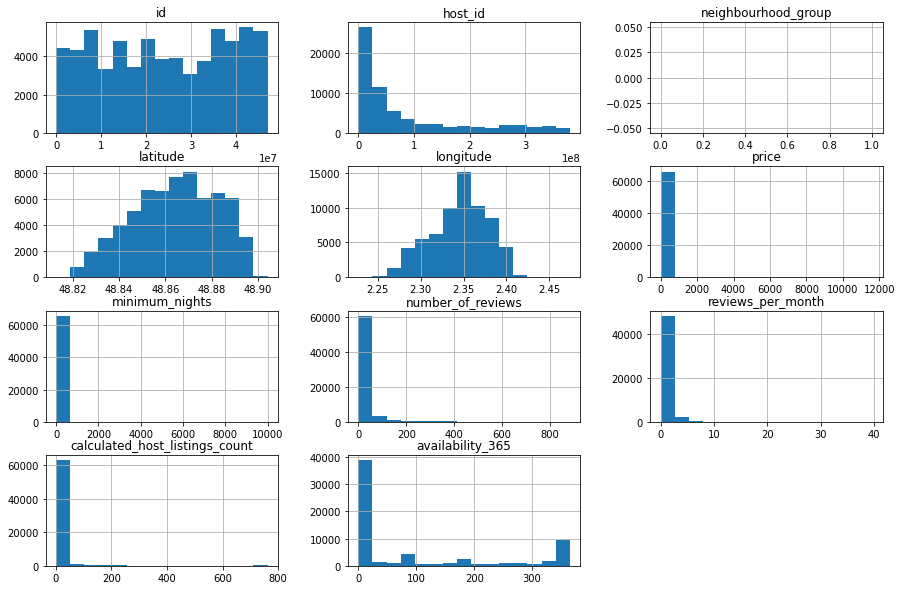

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

## **4) Analisando a presença de *outliers***

Ao observar os dados apresentados acima pode-se verificar que as variáveis `price`, `minimum_nights`e `calculated_host_listing_count`, pode-se verificar que existe uma uma distribuição distorcida que dificulta a compreensão e pode enviesar a analise dos dados.

Para confirmação da presença dos *outliers* no modelo foi utilizado os seguintes procedimentos:

* Resumo estátisco através do uso do método `describe()`
* Analisar os `boxplots` das variáveis selecionadas. 

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,65917.000000,65917.000000,65917.000000,50229.000000,65917.000000,65917.000000
mean,114.280201,5.656113,18.783394,0.689335,16.427098,96.354173
std,220.155923,44.279940,40.678117,0.983954,86.017717,137.362947
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,59.000000,1.000000,1.000000,0.130000,1.000000,0.000000
50%,80.000000,2.000000,5.000000,0.360000,1.000000,0.000000
75%,120.000000,4.000000,18.000000,0.870000,2.000000,179.000000
max,11600.000000,9999.000000,882.000000,39.620000,762.000000,365.000000


Observando as informações dispostas acima, pode-se confirmar algumas inferências realizadas acima:

* O valor `price`de 75% dos dados possui valores até 120 e o valor máximo apresentados é 11600.00;
* O valor máximo de `minimun_nights`é de 9999, muito superior ao número de dias de um ano (365 dias)

### Boxplot para Price:

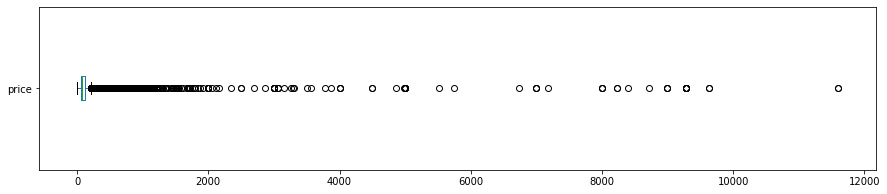


price: valores acima de 1200
207 entradas
0.3140%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1200 para price
print("\nprice: valores acima de 1200")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1000), figsize=(15,3));

### Boxplot para minimum_nights

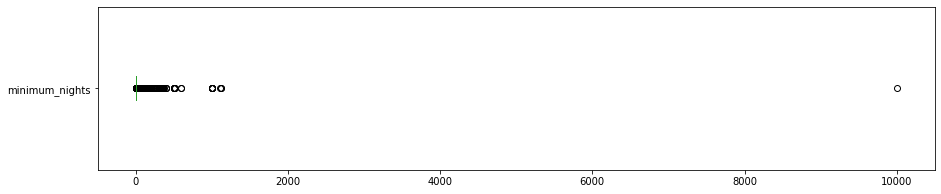

minimum_nights: valores acima de 30:
906 entradas
1.3745%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

### Removendo *outliers*

Após da verificação e constatação da presença de *outliers*, faz-se a remoção dessas informações em `price` e `minimum_nights` e realiza-se a plotagem novamente dos histogramas.






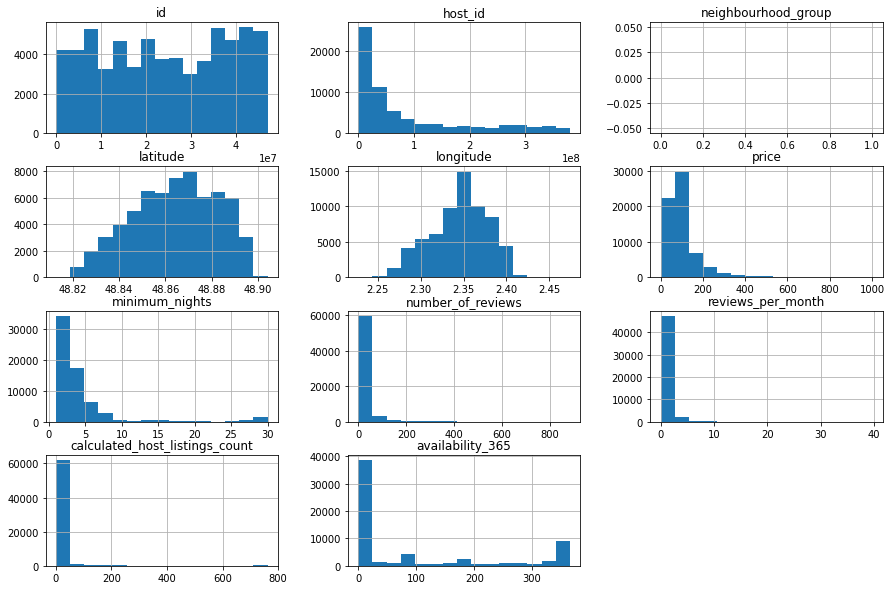

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

## **5) Analisando a correlação entre as variáveis**


Correlação  é qualquer relação dentro de uma ampla classe de relações estatísticas que envolva dependência entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis.

Desta meneria segue-se o seguinte procedimento:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.014079,-0.001881,0.007315,0.077178,0.224094
minimum_nights,-0.014079,1.000000,-0.049669,-0.095561,0.022700,0.115227
number_of_reviews,-0.001881,-0.049669,1.000000,0.754796,-0.016809,0.198413
reviews_per_month,0.007315,-0.095561,0.754796,1.000000,0.019709,0.246147
calculated_host_listings_count,0.077178,0.022700,-0.016809,0.019709,1.000000,0.066151
availability_365,0.224094,0.115227,0.198413,0.246147,0.066151,1.000000


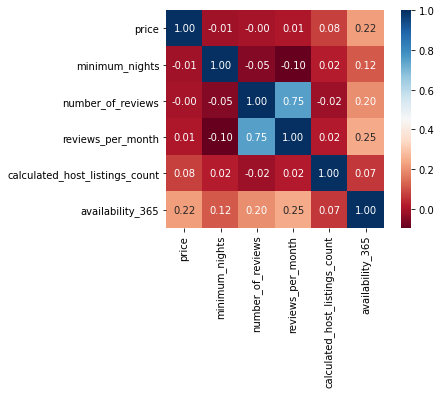

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## **6) Analisando os tipos de imóvel mais alugados no Airbnb**

A variável `room_type`indica o tipo de imóvel anunciado. Desta forma é possível indentificar a quantidade de tipos de imóveis são oferecidos e suas quantidades.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    55565
Private room        7457
Hotel room          1373
Shared room          416
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.857339
Private room       0.115058
Hotel room         0.021185
Shared room        0.006419
Name: room_type, dtype: float64

## **7) Analisando as localidades mais caras**

Agrupando as informações de `neighbourhood_group` e `price`é possível identificar a disposição dos preços de locação por regiões em Paris.






In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Élysée            183.083570
Louvre            155.010036
Luxembourg        152.167358
Palais-Bourbon    152.048110
Bourse            142.568099
Passy             140.302487
Hôtel-de-Ville    137.996290
Temple            132.189020
Panthéon          118.417363
Opéra             115.287551
Name: price, dtype: float64

Desta maneira é possível verificar que os bairros mais caros se encontram em regiões centrais próximos aos principais pontos da cidade.

<center><img alt="Analisando Airbnb" width="50%" src="https://lh3.googleusercontent.com/proxy/TaGTgh2PQgTu_2W86mJP4jnu53FEbPxKOiX1va2HlsbOwoCTUv-1L9ftXt4nhPdJ1OycYEXvJsAHLf3SGyLwhsnp1CVcO09pMmwm396497X4_p9LluG4ybbJ1i_NfXVxaRMRdpJiHBwBJIFK8M4pedR7XdTfxO_i9Qfv09N3rrJASrA5hXfTQBDjPw"></center>


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

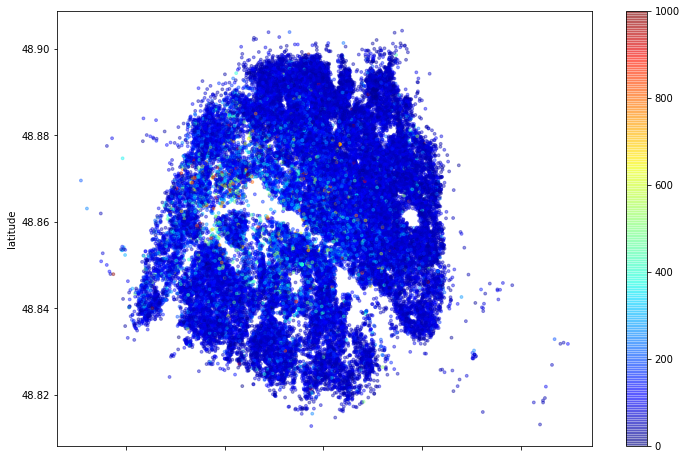

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## **Conlusão**

Esta é uma base que possuí algumas limitações em relação à amostra. Foi optado por este arquivo por ser uma base de dados resumida e de facilitada interpretação.

O que pode-se perceber com os dados é que existem *outliers* na base e fora possível tratar esses dados para que  o dataframe fosse aproveitado.

Conseguiu-se observar as localizações mais caras por região e também pode-se observar que não houve muita correlação entre as variáveis selecionadas.

Outro estudo mais elaborado ainda será realizado com a base completa e mais inferências poderão ser realizadas futuramente.